### Import the necessary libraries

### Load the training data from train.csv file

### Print the shape of the train dataset

### Declare a variable IMAGE_SIZE = 128 as we will be using MobileNet which will be taking Input shape as 128 * 128 

### With the help of csv.reader write a for loop which can load the train.csv file and store the path, width, height, x0,y0,x1,y1 in induvidual variables. <br>
1. Create a list variable known as 'path' which has all the path for all the training images
2. Create an array 'coords' which has the resized coordinates of the bounding box for the training images

<u>Note:</u> All the training images should be downsampled to 128 * 128 as it is the input shape of MobileNet (which we will be using for Object detection). Hence the corresponding coordinates of the bounding boxes should be changed to match the image dimension of 128 * 128 

### Write a for loop which can load all the training images into a variable 'batch_images' using the paths from the 'paths' variable
<u>Note:</u> Convert the image to RGB scale as the MobileNet accepts 3 channels as inputs   

### Import MobileNet and load MobileNet into a variable named 'model' which takes input shape of 128 * 128 * 3. Freeze all the layers. Add convolution and reshape layers at the end to ensure the output is 4 coordinates

### Define a custom loss function IoU which calculates Intersection Over Union

In [0]:
def loss(gt,pred):
    intersections = 0
    unions = 0
    diff_width = np.minimum(gt[:,0] + gt[:,2], pred[:,0] + pred[:,2]) - np.maximum(gt[:,0], pred[:,0])
    diff_height = np.minimum(gt[:,1] + gt[:,3], pred[:,1] + pred[:,3]) - np.maximum(gt[:,1], pred[:,1])
    intersection = diff_width * diff_height
    
    # Compute union
    area_gt = gt[:,2] * gt[:,3]
    area_pred = pred[:,2] * pred[:,3]
    union = area_gt + area_pred - intersection

#     Compute intersection and union over multiple boxes
    for j, _ in enumerate(union):
        if union[j] > 0 and intersection[j] > 0 and union[j] >= intersection[j]:
            intersections += intersection[j]
            unions += union[j]

    # Compute IOU. Use epsilon to prevent division by zero
    iou = np.round(intersections / (unions + epsilon()), 4)
    iou = iou.astype(np.float32)
    return iou

def IoU(y_true, y_pred):
    iou = tf.py_func(loss, [y_true, y_pred], tf.float32)
    return iou

### Write model.compile function & model.fit function with: <br>
1. Optimizer = Adam, Loss = 'mse' and metrics = IoU
2. Epochs = 30, batch_size = 32, verbose = 1

### Pick a test image from the given data

### Resize the image to 128 * 128 and preprocess the image for the MobileNet model

### Predict the coordinates of the bounding box for the given test image

### Plot the test image using .imshow and draw a boundary box around the image with the coordinates obtained from the model

In [0]:
x0 = int(region[0] * image_width / IMAGE_SIZE) # Scale the BBox
y0 = int(region[1] * image_height / IMAGE_SIZE)

x1 = int((region[2]) * image_width / IMAGE_SIZE)
y1 = int((region[3]) * image_height / IMAGE_SIZE)


import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np


# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unscaled)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), (x1 - x0) , (y1 - y0) , linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

## Time Series Analysis using LSTM

### Download Data
Link: https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990#!ds=2324&display=line

#### Description
Daily minimum temperatures in Melbourne, Australia, 1981-1990

Units: Degrees Celcius

#### Steps before loading
- Rename the column name with temperature values to "Temperature"
- In the last, there is one extra row in the data, remove it by opening the file and save it again.
- There are some values in Temperature column which have a "?" before them, they will give error, remove "?" before them and save the file
- If you don't want to do these steps, just load the data file given by Great Learning.

### Import required libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

#### Mount google drive

### Load the  data file

In [4]:
#Uploading Local file

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving daily-minimum-temperatures-in-me.csv to daily-minimum-temperatures-in-me.csv
User uploaded file "daily-minimum-temperatures-in-me.csv" with length 55995 bytes


In [0]:
temp= pd.read_csv("daily-minimum-temperatures-in-me.csv", index_col= 'Date')

### Plot the data

In [6]:
temp.head()

,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


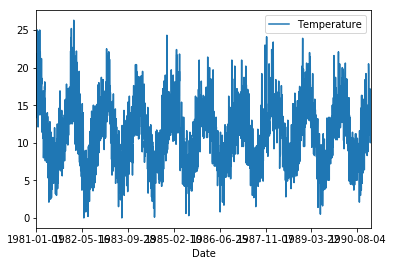

In [7]:
temp.plot()

### Check for null values and treat them

In [8]:
temp.isnull().any()

Temperature    False
dtype: bool

#### Drop null values (if any)

### Get the representation of the distribution of data in the form of histogram

In [0]:
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


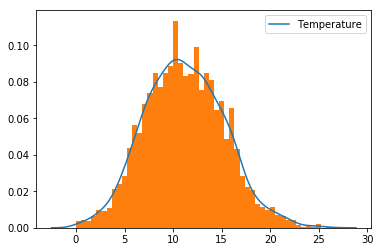

In [10]:
plt.figure()
sns.kdeplot(temp['Temperature']);
plt.hist(temp['Temperature'], histtype='barstacked', normed=True, bins= 50);
plt.show()

### Check the maximum and minimum values

In [11]:
print("max= ",temp['Temperature'].max(),"\n min= ", temp['Temperature'].min())

max=  26.3 
 min=  0.0


### Normalize the data

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
temp= temp.astype('float32')

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(temp)

### Check the maximum and minimum values of scaled data

In [15]:
print("max= ",temp['Temperature'].max(),"\n min= ", temp['Temperature'].min())

max=  26.3 
 min=  0.0


### Split data into Training and Testing set 
<u>Note</u> The train and test data has to be sequential. Keep the first 70% of data in training and the bottom 30% in test data 

In [16]:
train_size = int(len(scaled) * 0.8)
test_size = len(scaled - train_size)
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 2920
test: 730


## Create the sequential data
Map the temperature at a particular time t to the temperature at time t+n, where n is any number you define.

For example: to map temperatures of consecutive days, use t+1, i.e. loop_back = 1

#### Define your function to create dataset

In [0]:
def create_dataset(dataset, look_back=1):
    print(len(dataset), look_back)
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        print(i)
        print('X {} to {}'.format(i, i+look_back))
        print(a)
        print('Y {}'.format(i + look_back))
        print(dataset[i + look_back, 0])
        dataset[i + look_back, 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

### Use function to get training and test set

In [18]:
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

2920 1
0
X 0 to 1
[0.7870723]
Y 1
0.6806083702582986
1
X 1 to 2
[0.68060837]
Y 2
0.7148288890658444
2
X 2 to 3
[0.71482889]
Y 3
0.5551331104563756
3
X 3 to 4
[0.55513311]
Y 4
0.6007604809535642
4
X 4 to 5
[0.60076048]
Y 5
0.6007604809535642
5
X 5 to 6
[0.60076048]
Y 6
0.6007604809535642
6
X 6 to 7
[0.60076048]
Y 7
0.6615969628626882
7
X 7 to 8
[0.66159696]
Y 8
0.8288973334395067
8
X 8 to 9
[0.82889733]
Y 9
0.7604562958244149
9
X 9 to 10
[0.7604563]
Y 10
0.6159696286268815
10
X 10 to 11
[0.61596963]
Y 11
0.5057034439755123
11
X 11 to 12
[0.50570344]
Y 12
0.6349810360224919
12
X 12 to 13
[0.63498104]
Y 13
0.817490518011246
13
X 13 to 14
[0.81749052]
Y 14
0.9505703697805186
14
X 14 to 15
[0.95057037]
Y 15
0.7870722951873749
15
X 15 to 16
[0.7870723]
Y 16
0.7832699992037001
16
X 16 to 17
[0.78327]
Y 17
0.9429657778131689
17
X 17 to 18
[0.94296578]
Y 18
0.6730038508137127
18
X 18 to 19
[0.67300385]
Y 19
0.5893536292639215
19
X 19 to 20
[0.58935363]
Y 20
0.6920152582093231
20
X 20 to 21
[0.6

### Transform the prepared train and test input data into the expected structure using numpy.reshape()

In [19]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(2918, 1, 1)
(728, 1, 1)


In [20]:
print(y_train.shape)
print(y_test.shape)

(2918,)
(728,)


In [21]:
y_test

array([0.66159696, 0.70342207, 0.63878326, 0.43726237, 0.36121674,
       0.46387833, 0.59695818, 0.61977185, 0.5171103 , 0.47908748,
       0.52471485, 0.46007607, 0.5095057 , 0.65779467, 0.73764259,
       0.63117874, 0.52851711, 0.49809889, 0.60836504, 0.55133081,
       0.57034222, 0.47908748, 0.47528518, 0.57794678, 0.61596963,
       0.62737644, 0.76425859, 0.78327   , 0.64258556, 0.62737644,
       0.61216733, 0.54752852, 0.61977185, 0.59695818, 0.53992396,
       0.50190115, 0.63878326, 0.70342207, 0.63498104, 0.58174907,
       0.60456274, 0.57794678, 0.66539926, 0.69581748, 0.73764259,
       0.73764259, 0.74144489, 0.7794677 , 0.59695818, 0.57034222,
       0.61216733, 0.54372626, 0.49429659, 0.61596963, 0.67300385,
       0.50190115, 0.60076048, 0.70342207, 0.77566541, 0.83650193,
       0.74904948, 0.74524718, 0.77186311, 0.69581748, 0.71863119,
       0.77186311, 0.81368822, 0.69581748, 0.67680607, 0.67300385,
       0.48669204, 0.57414452, 0.57034222, 0.56273767, 0.45627

### Define sequntial model, add LSTM layer and compile the model

In [22]:
from keras.models import Sequential
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers
from keras.layers import Dense, Dropout

Using TensorFlow backend.


### Train the model for 100 epochs with batch size = 1

In [23]:
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.fit(X_train, y_train, epochs=100, batch_size=batch_size, verbose=2, shuffle=True)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
 - 6s - loss: 0.0210
Epoch 2/100
 - 5s - loss: 0.0142
Epoch 3/100
 - 5s - loss: 0.0120
Epoch 4/100
 - 5s - loss: 0.0113
Epoch 5/100
 - 4s - loss: 0.0109
Epoch 6/100
 - 5s - loss: 0.0107
Epoch 7/100
 - 5s - loss: 0.0105
Epoch 8/100
 - 5s - loss: 0.0103
Epoch 9/100
 - 5s - loss: 0.0101
Epoch 10/100
 - 5s - loss: 0.0101
Epoch 11/100
 - 4s - loss: 0.0102
Epoch 12/100
 - 5s - loss: 0.0102
Epoch 13/100
 - 5s - loss: 0.0102
Epoch 14/100
 - 5s - loss: 0.0102
Epoch 15/100
 - 5s - loss: 0.0101
Epoch 16/100
 - 5s - loss: 0.0102
Epoch 17/100
 - 5s - loss: 0.0102
Epoch 18/100
 - 5s - loss: 0.0102
Epoch 19/100
 - 5s - loss: 0.0102
Epoch 20/100
 - 5s - loss: 0.0102
Epoch 21/100
 - 5s - loss: 0.0102
Epoch 22/100
 - 5s - loss: 0.0102
Epoch 23/100
 - 5s - loss: 0.0102
Epoch 24/100
 - 5s - loss: 0.0102
Epoch 25/100
 - 4s - loss: 0.0101
Epoch 26/100
 - 5s - loss: 0.0102
Epoch 27/100
 - 5s - loss

### Make Predictions and Evaluate your model

In [24]:
import math
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(X_train, batch_size=batch_size)

model.reset_states()

testPredict = model.predict(X_test, batch_size=batch_size)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.65 RMSE
Test Score: 2.42 RMSE


In [0]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [26]:
mean_absolute_percentage_error(y_test,testPredict)

52.40850335367957

In [0]:
#RMSE is not correct metric to measure accuracy of Time Series Data So using Mape now. 
# Basis the previous model the MAPE is poor.

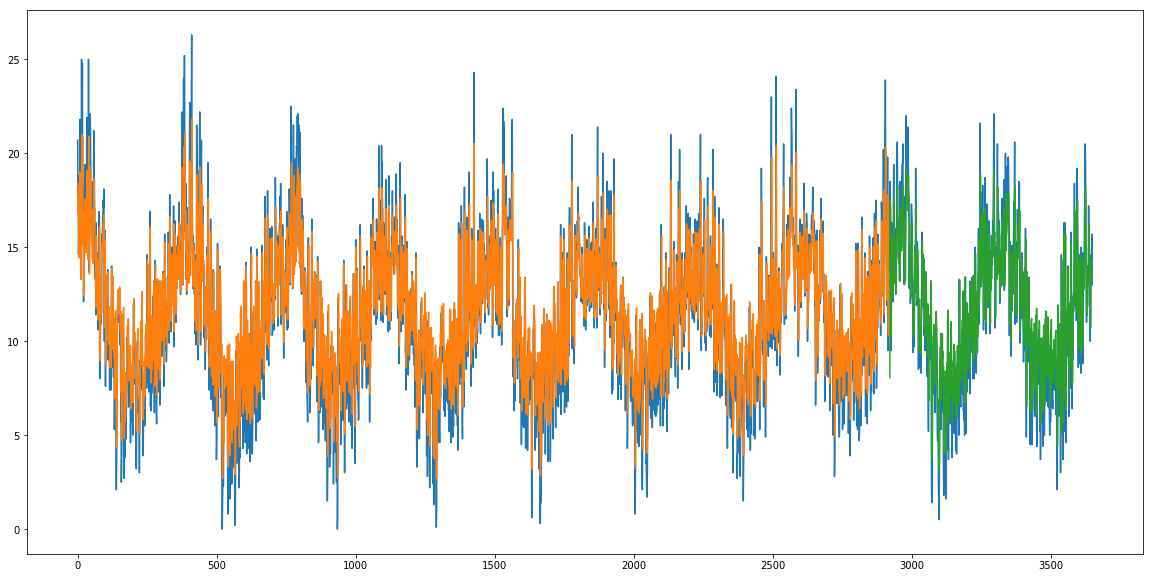

In [28]:
trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(scaled)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [34]:


batch_size = 2
model1 = Sequential()
model1.add(LSTM(5, batch_input_shape=(batch_size, look_back, 4), stateful=True))
model1.add(Dropout(0.2))
model1.add(Dense(1))
model1.compile(loss='mean_absolute_percentage_error', optimizer='rmsprop')

import numpy as np
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

model1.fit(X_train, y_train, epochs=100, batch_size=batch_size, verbose=2, shuffle=True)

ValueError: ignored